In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━

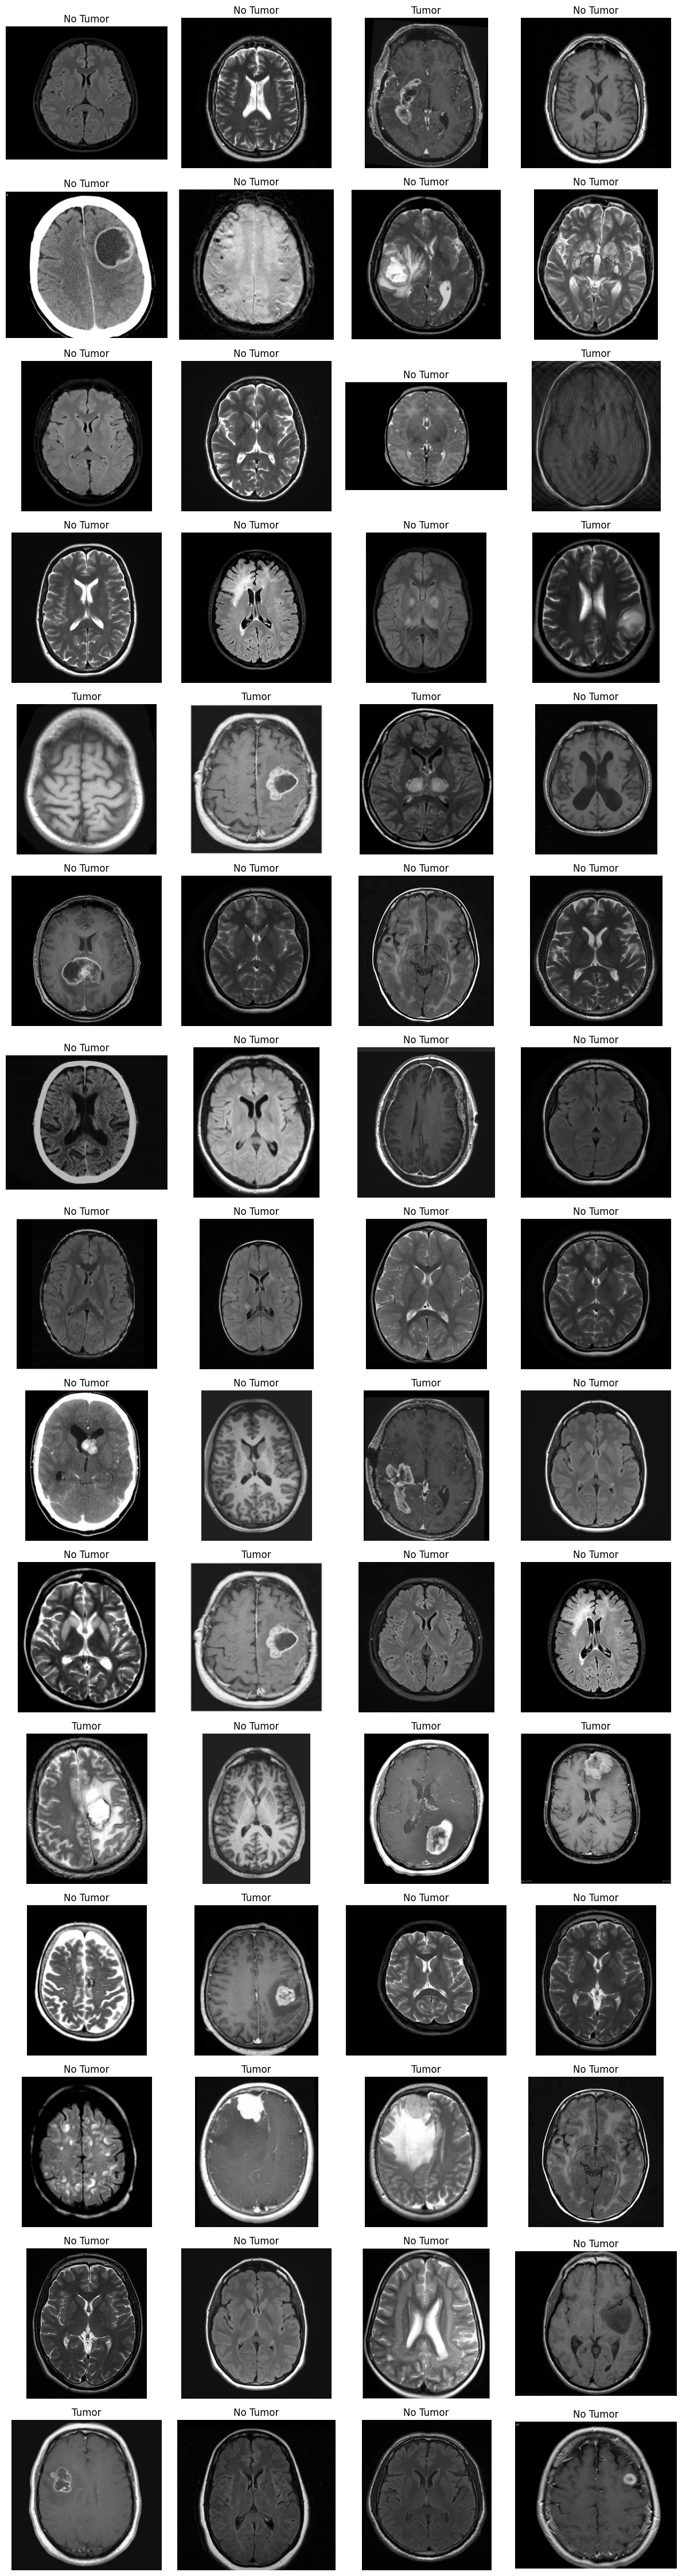

In [19]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the trained categorical model
model = load_model('/content/drive/MyDrive/BrainTumorMainTrainCategorical15Binaryepochs.h5')

# Define the path to the pred folder
pred_folder = '/content/drive/MyDrive/Brain Tumor Detection/Datasets/pred/'

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(pred_folder) if f.endswith('.jpg') or f.endswith('.png')]

# Define the class labels for your model (modify this based on your classes)
class_labels = ["No Tumor", "Tumor"]

# Calculate number of rows and columns needed for the grid
num_images = len(image_files)
cols = 4  # Set number of columns in the grid
rows = (num_images // cols) + (num_images % cols > 0)  # Round up if there's a remainder

# Create a plot to display images and their predictions
plt.figure(figsize=(cols * 3, rows * 3))  # Adjust the figure size dynamically

# Iterate through each image file
for i, image_file in enumerate(image_files):
    # Load and preprocess the image
    image_path = os.path.join(pred_folder, image_file)
    image = cv2.imread(image_path)
    img = Image.fromarray(image)

    # Resize the image to match the input size your model expects (e.g., 64x64)
    img = img.resize((64, 64))
    img = np.array(img)

    # Normalize the image (if necessary, assuming pixel values should be between 0 and 1)
    img = img / 255.0

    # Expand dimensions to match the model's input shape
    input_img = np.expand_dims(img, axis=0)

    # Predict using the model
    predictions = model.predict(input_img)

    # Get the predicted class (class with the highest probability)
    predicted_class = np.argmax(predictions, axis=1)

    # Map the predicted class index to the label
    result = class_labels[predicted_class[0]]

    # Display the image and the result
    plt.subplot(rows, cols, i+1)  # Adjust the number of rows and columns dynamically
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"{result}")
    plt.axis('off')

# Show all images with their predictions
plt.tight_layout()
plt.show()
